In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


Import some important libraraies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Load The Data**

In [3]:
train = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


1 Collecting the data
2 Clean the data
3 Base Model
4 Model selection
5 Best Model
6 Submit to competition

In [4]:
train.tail()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...
13635,379,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_278956,u_1oKYPsERQ0GvUcjIsuAxzmnsQGW,morgantowndan,1,1622717703,0,0,0,5,100,Super. I added 1/2 lb chopped bacon to mine. H...


# **(EDA) - Exploratory Data Analysis**

In [5]:
train.shape

(13636, 15)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


we can see here we have total 10 int columns and 5 obj columns.There is one column which have two null values so we have to delete those rows for better result.

**Looking for missing value**

In [7]:
print(train.isnull().sum())

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64


Looking for percentage of null value

In [8]:
train.isnull().sum()/train.shape[0]*100

ID                   0.000000
RecipeNumber         0.000000
RecipeCode           0.000000
RecipeName           0.000000
CommentID            0.000000
UserID               0.000000
UserName             0.000000
UserReputation       0.000000
CreationTimestamp    0.000000
ReplyCount           0.000000
ThumbsUpCount        0.000000
ThumbsDownCount      0.000000
Rating               0.000000
BestScore            0.000000
Recipe_Review        0.014667
dtype: float64

Actually There is only two missing values so it's showing like this

**Remove the Missing row**

In [9]:
train.dropna(inplace=True)
print(train.isnull().sum())

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64


Now here we can see there are no missing value

In [10]:
train.describe(include='all')

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
count,13634.00000,13634.000000,13634.000000,13634,13634,13634,13634,13634.000000,1.363400e+04,13634.000000,13634.000000,13634.000000,13634.000000,13634.00000,13634
unique,NaN,NaN,NaN,100,13634,10782,10619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13370
top,NaN,NaN,NaN,Cheeseburger Soup,sp_aUSaElGf_12259_c_149978,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delicious!
freq,NaN,NaN,NaN,552,1,20,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
mean,121.05589,38.629382,21787.406117,NaN,NaN,NaN,NaN,2.160481,1.623714e+09,0.014523,1.098430,0.543788,4.288617,153.13569,NaN
std,116.97871,29.671643,23884.389851,NaN,NaN,NaN,NaN,10.087154,5.444406e+06,0.137333,4.166771,3.265893,1.544928,140.99578,NaN
min,0.00000,1.000000,386.000000,NaN,NaN,NaN,NaN,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,45.00000,12.000000,6504.000000,NaN,NaN,NaN,NaN,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.00000,NaN
50%,91.00000,33.000000,14600.000000,NaN,NaN,NaN,NaN,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.00000,NaN
75%,148.00000,63.000000,33121.000000,NaN,NaN,NaN,NaN,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.00000,NaN


Here we can see all statistical distribution of each column.

Looking only for Object Columns

In [11]:
train.describe(include = "object")

,RecipeName,CommentID,UserID,UserName,Recipe_Review
count,13634,13634,13634,13634,13634
unique,100,13634,10782,10619,13370
top,Cheeseburger Soup,sp_aUSaElGf_12259_c_149978,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,Delicious!
freq,552,1,20,21,12


Here we can see there are total 100 Recipies. Top Recipe is Cheeseburger Soup.

In [12]:
train.nunique()

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13634
UserID               10782
UserName             10619
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

Here we can see total no of unique values in every columns, with this we can see for categorical data.

In [13]:
train['Rating'].value_counts()

Rating
5    10369
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

Here we can see the dictribution of rating column.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


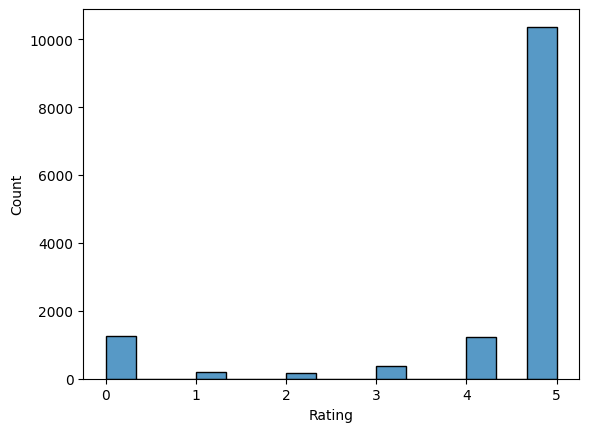

In [14]:

sns.histplot(train['Rating']);

Looking for relation between all nemurical columns.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

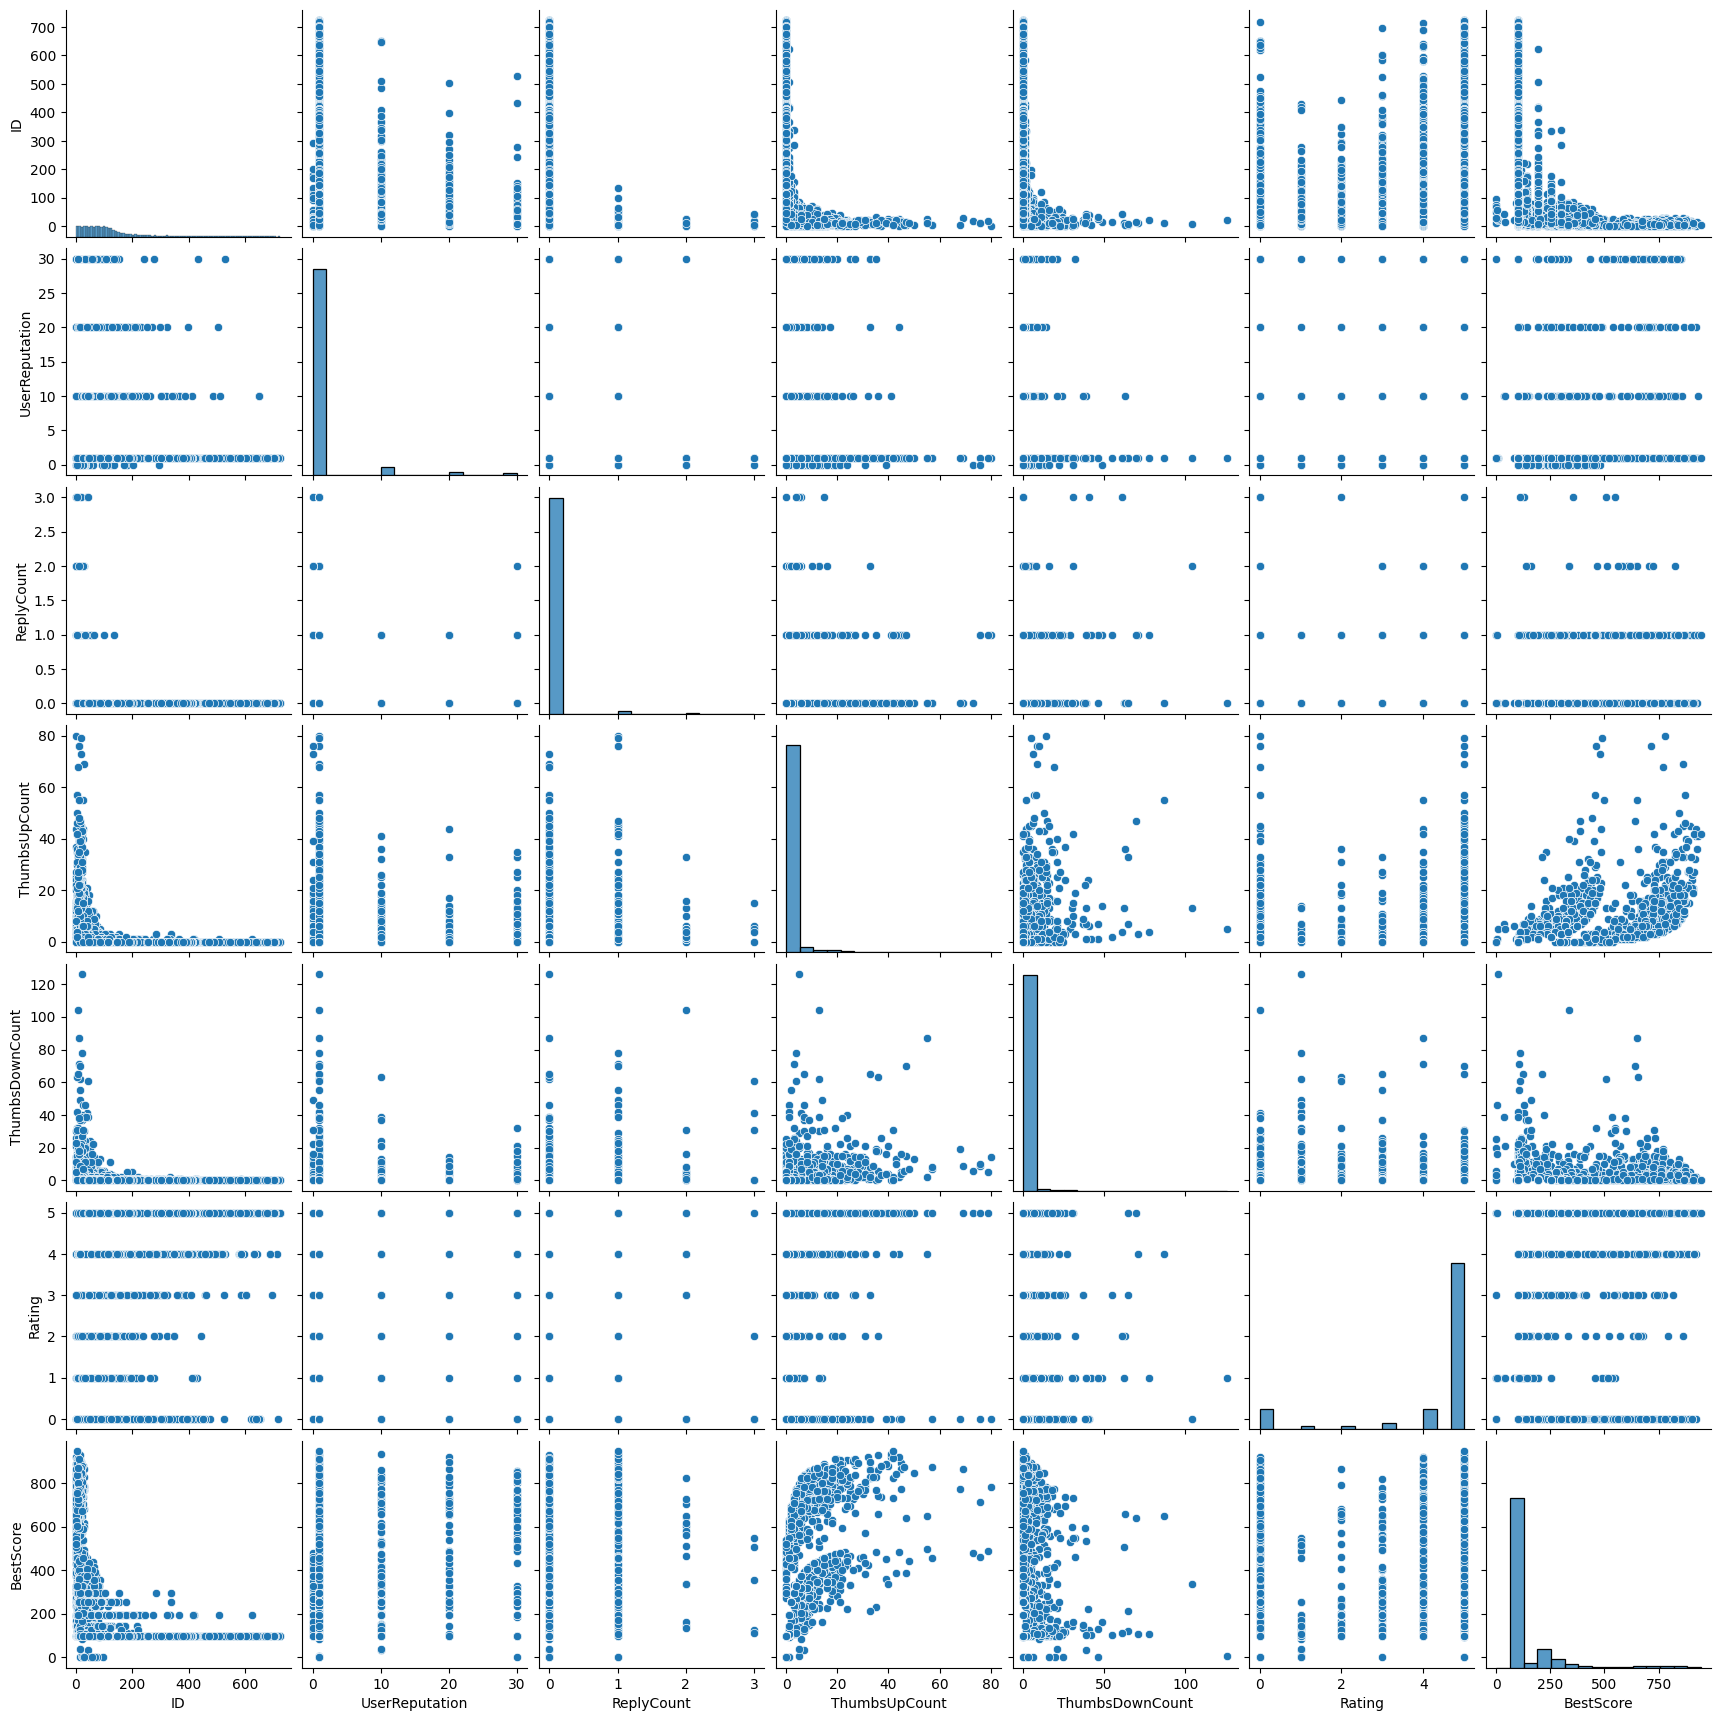

In [102]:
import seaborn as sns

sns.pairplot(train)
plt.show()

<Figure size 1500x400 with 0 Axes>

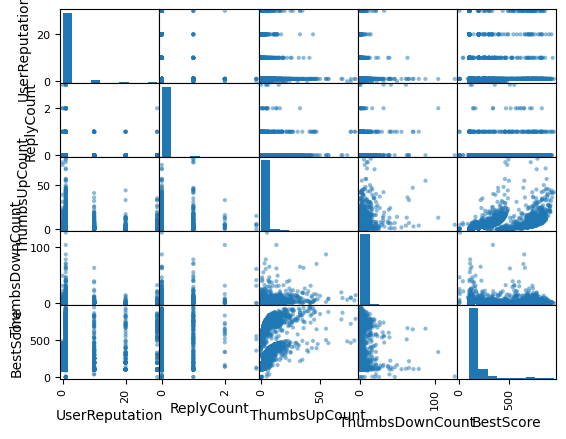

<Figure size 1500x400 with 0 Axes>

In [106]:
from pandas.plotting import scatter_matrix
attribute_list = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
scatter_matrix(train[attribute_list])
plt.figure(figsize = (15, 4))

We can see there are some relation between "Best Score" and "ThumbsUpCount" columns.

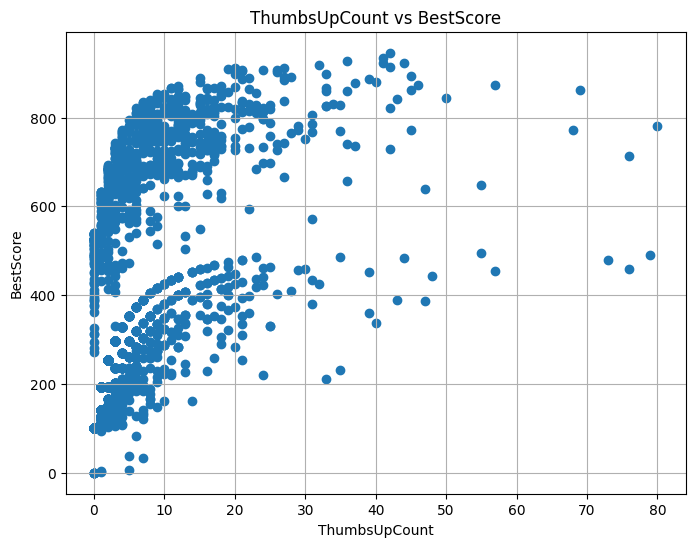

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(train['ThumbsUpCount'], train['BestScore'], marker='o')
plt.title('ThumbsUpCount vs BestScore')
plt.xlabel('ThumbsUpCount')
plt.ylabel('BestScore')
plt.grid(True)
plt.show()

Checking for outliers

UserReputation
Skew : 33.15


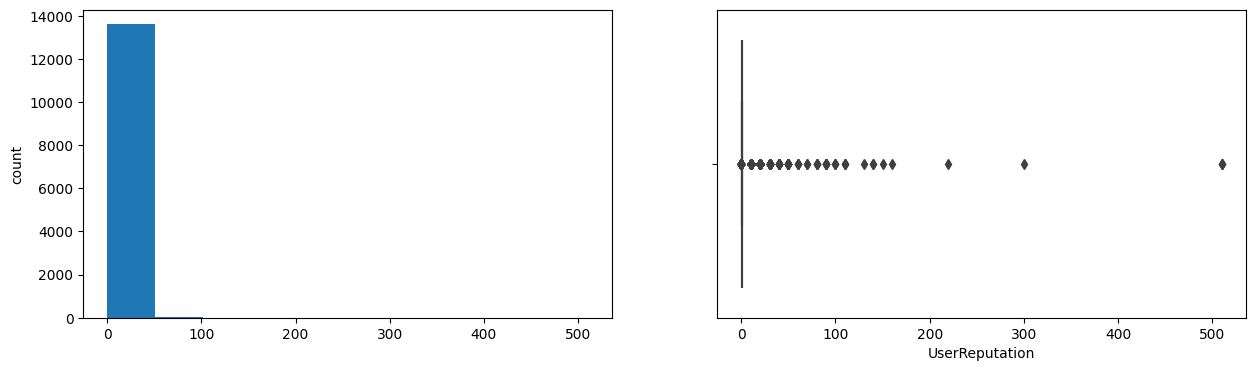

ReplyCount
Skew : 11.41


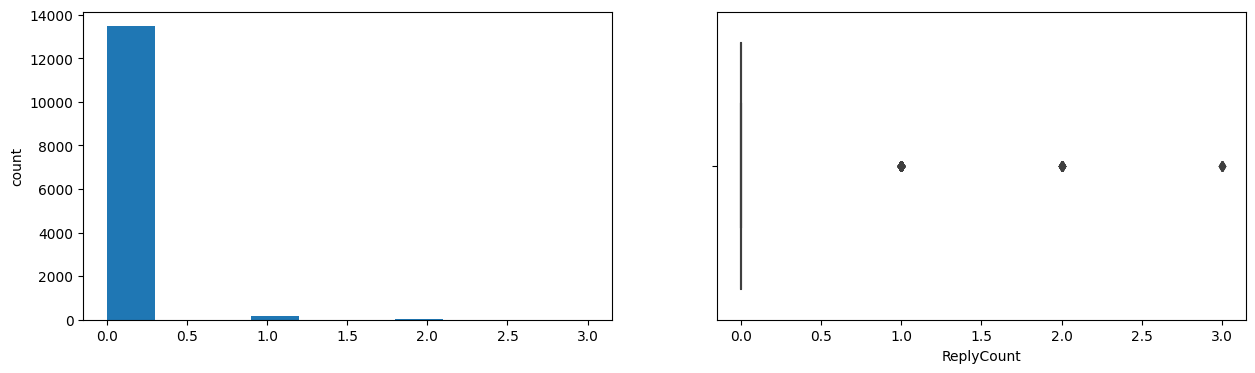

ThumbsUpCount
Skew : 7.89


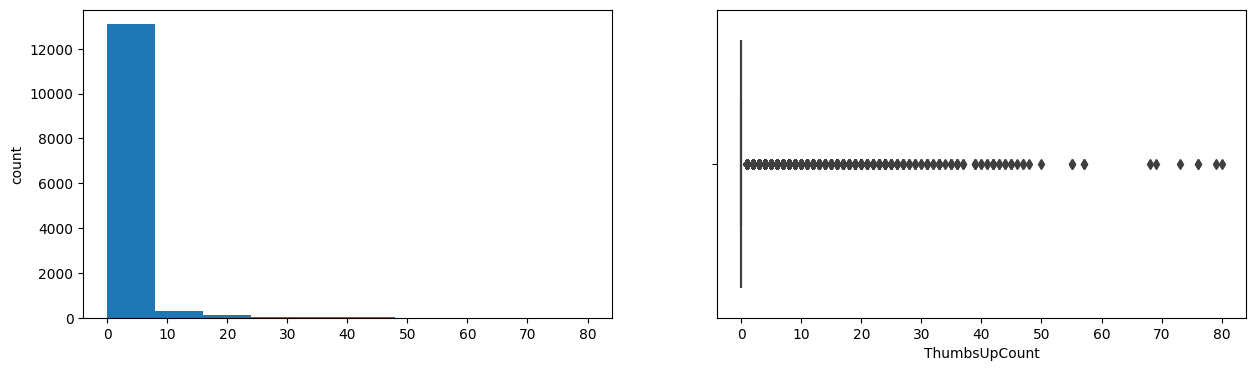

ThumbsDownCount
Skew : 16.66


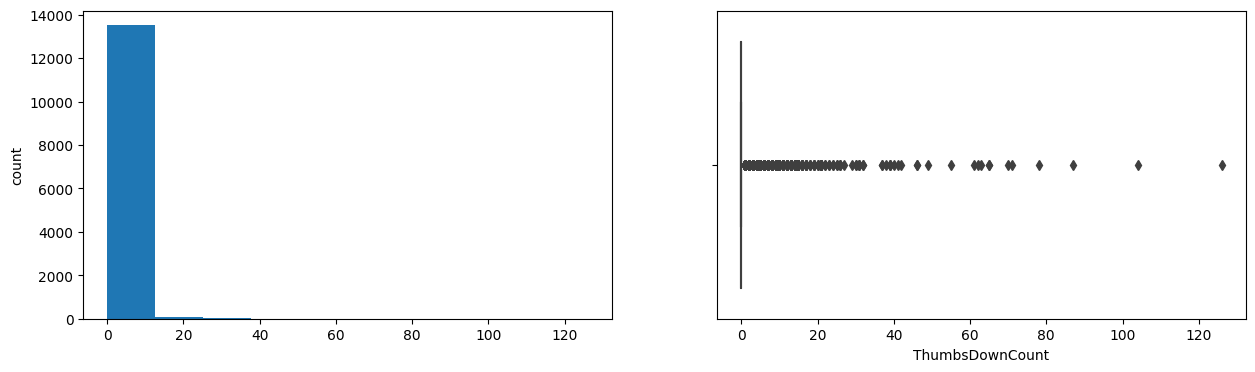

BestScore
Skew : 3.39


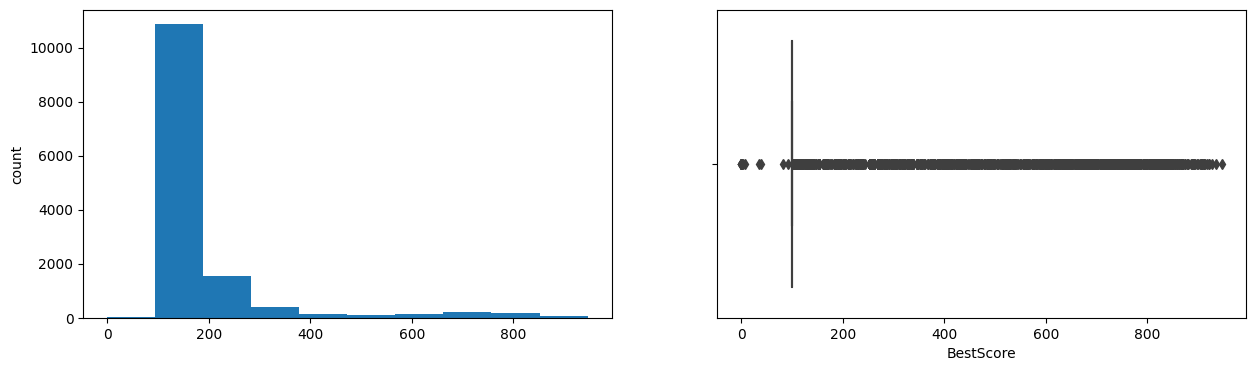

In [16]:
num_cols = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

for col in num_cols:
    print(col)
    print('Skew :', round(train[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    train[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col])
    plt.show()

Here we can clearly see there are some outliers in the data.

In [92]:
train['ReplyCount'].value_counts()

ReplyCount
0    13462
1      151
2       16
3        5
Name: count, dtype: int64

we can see here there are no such data in this column mostly all the values are 0.

In [93]:
train['UserReputation'].value_counts()

UserReputation
1     12706
10      478
20      217
0       118
30      115
Name: count, dtype: int64

We can see here that most of the data points are under 20 so I'm replacing all the values greater than 30 with 30 for better distribution

In [89]:
train['UserReputation'][train['UserReputation']<30].sort_values(ascending = False)

0        20
854      20
10806    20
9533     20
9546     20
         ..
11799     0
11800     0
6578      0
9738      0
502       0
Name: UserReputation, Length: 13519, dtype: int64

In [90]:
train['UserReputation'][train['UserReputation']>30] = 30

/tmp/ipykernel_26/1441165794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['UserReputation'][train['UserReputation']>30] = 30


array([[<Axes: title={'center': 'UserReputation'}>]], dtype=object)

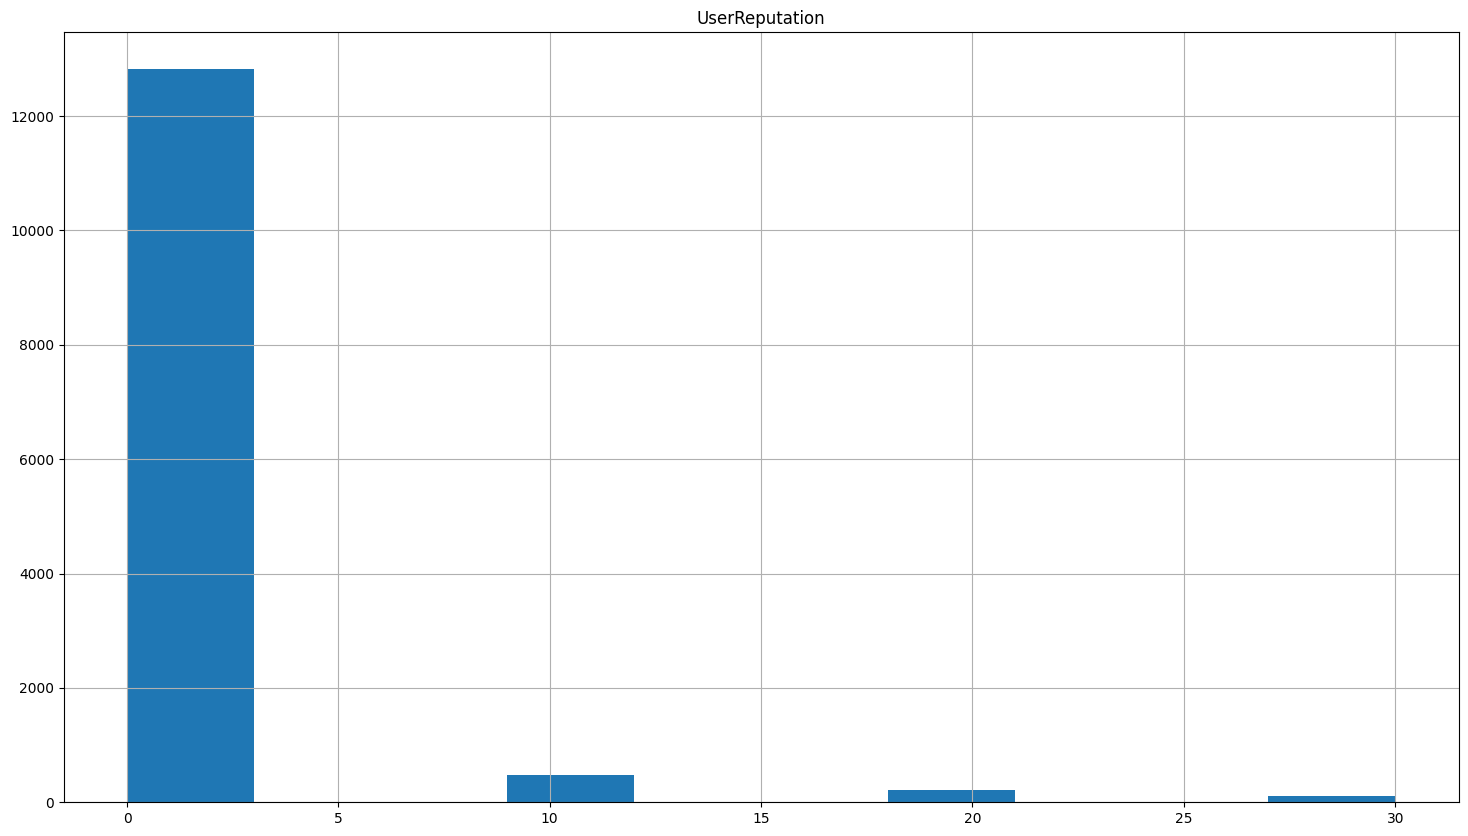

In [91]:
train.hist(['UserReputation'], figsize = (18,10))

Now we can see a distribution.

# **Preprocessing**

Delete all unwanted columns.

There are some columns which I don't think will be useful in model. Mostly these are names or ID which are not useful in model making.

In [20]:
unwanted_columns = ['CommentID', 'RecipeNumber', 'UserID', 'UserName','CreationTimestamp','RecipeCode','RecipeName']
train = train.drop(unwanted_columns, axis = 1)
train.head()

,ID,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,20,0,0,0,5,100,great recipe! I have made them just as written...
1,72,1,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,1,0,0,0,3,100,I think I was looking for something extra spec...
3,7,1,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,1,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


seprate our target variable

In [21]:
X = train.drop('Rating', axis = 1)
y = train.Rating.copy()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

Create 2 pipeline one for numeric column transformation and another for review column treatment.
Then split the data into train test data.

In [23]:
numeric_features = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
text_feature = 'Recipe_Review'

numeric_transformer =Pipeline(steps=[('scaler', StandardScaler())])
text_transformer = Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=1000))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('text', text_transformer, text_feature)
])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Dummy classifier**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier

model = DummyClassifier(random_state = 42)

# Define the full pipeline including preprocessing and the model
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess numeric and text features
    ('model', model)  # Apply the model
])

# Fit the pipeline on training data
pipeline1.fit(x_train, y_train)

# Predict on test data
dummy_predictions_train = pipeline1.predict(x_train)
dummy_predictions_test = pipeline1.predict(x_test)

# Evaluate the model
accuracy = pipeline1.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7634763476347635


In [25]:
from sklearn.metrics import accuracy_score as ac

train_score = ac(dummy_predictions_train, y_train)
test_score = ac(dummy_predictions_test, y_test)
print(f'Train score: {train_score}, Test score: {test_score}')

Train score: 0.7597872925644081, Test score: 0.7634763476347635


In [26]:
dummy_predictions_test

array([5, 5, 5, ..., 5, 5, 5])

# Logistic Regression

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

# Define the full pipeline including preprocessing and the model
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', model) 
])

# Fit the pipeline on training data
pipeline2.fit(x_train, y_train)

# Predict on train and test data
logistic_predictions_train = pipeline2.predict(x_train)
logistic_predictions_test = pipeline2.predict(x_test)

# Evaluate the model
accuracy = pipeline2.score(x_test, y_test)
print("Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7777777777777778


In [28]:
from sklearn.metrics import log_loss


logistic_probabilities_train = pipeline2.predict_proba(x_train)
logistic_probabilities_test = pipeline2.predict_proba(x_test)

# Calculate log loss for train and test data
log_loss_train = log_loss(y_train, logistic_probabilities_train)
log_loss_test = log_loss(y_test, logistic_probabilities_test)

print("Log Loss for Train Data:", log_loss_train)
print("Log Loss for Test Data:", log_loss_test)

Log Loss for Train Data: 0.5755817751684613
Log Loss for Test Data: 0.6743287852109147


**Hyperparameter tuning**

In [29]:

#from sklearn.model_selection import GridSearchCV



# Define all hyperparameters
# param_grid = {
#     'model__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'model__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  # Solver for optimization
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=pipeline2, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Fit GridSearchCV to training data
# grid_search.fit(x_train, y_train)

# # Print best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Evaluate the best model
# accuracy = grid_search.best_estimator_.score(x_test, y_test)
# print("Accuracy of the best model:", accuracy)



Best hyperparameters: {'model__C': 1, 'model__solver': 'newton-cg'}
Accuracy of the best model: 0.7763109644297763

Checking for train and test score

In [30]:
from sklearn.metrics import accuracy_score as ac

train_score = ac(logistic_predictions_train, y_train)
test_score = ac(logistic_predictions_test, y_test)
print(f'Train score: {train_score}, Test score: {test_score}')

Train score: 0.7968277253140186, Test score: 0.7777777777777778


Plot Confusion matrix for test 

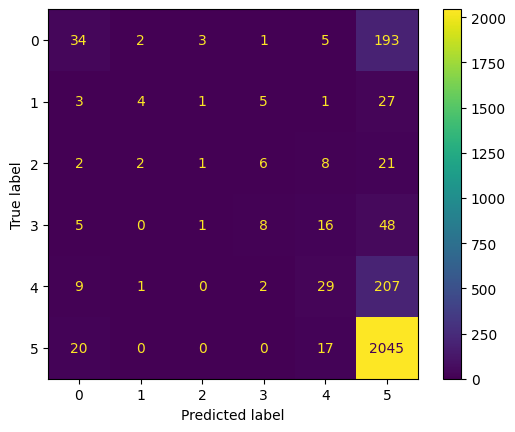

In [107]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, logistic_predictions_test)

cmf = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot
cmf.plot();




Here we can see confusion matricx between our predicted value and actual value.

**Crossvalidation Performance**

In [32]:
from sklearn.model_selection import cross_validate

train_cv = cross_validate(pipeline2, x_train, y_train, cv=5)

train_cv['test_score'].mean(), train_cv['test_score'].std()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(0.7732647718757656, 0.002153082046967168)

Here we can see the mean and std. deviation with Logistic Regression model.

# Test Data

In [33]:
test = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [34]:
test.shape

(4546, 14)

In [35]:
unwanted_columns = ['CommentID', 'RecipeNumber', 'UserID', 'UserName','CreationTimestamp','RecipeCode','RecipeName']
test = test.drop(unwanted_columns, axis = 1)
test.head()

,ID,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,1,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,1,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,1,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,1,0,4,3,212,I made this and followed the instructions as d...
4,27,1,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [36]:
test.dropna(inplace=True)
print(test.isnull().sum())

ID                 0
UserReputation     0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
BestScore          0
Recipe_Review      0
dtype: int64


In [37]:
prediction1 = pipeline2.predict(test)
prediction1 = prediction1.astype(int)



In [38]:
sample = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv')
sample.head()

,ID,Rating
0,1,5
1,2,2
2,3,4
3,4,2
4,5,4


In [39]:
submission = pd.DataFrame(columns = ['ID', 'Rating'])
submission['ID'] = [i for i in range(1,len(prediction1)+1)]
submission['Rating'] = prediction1
submission.to_csv('submission.csv', index = False)

In [40]:
submission.head()

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,0
4,5,5


In [41]:
submission['Rating'].value_counts()

Rating
5    4284
0     104
4     103
3      28
1      23
2       4
Name: count, dtype: int64

# RandomForest

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Define the full pipeline including preprocessing and the model
pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model) 
])

# Fit the pipeline on training data
pipeline3.fit(x_train, y_train)

# Predict on train and test data
RF_predictions_train = pipeline3.predict(x_train)
RF_predictions_test = pipeline3.predict(x_test)

# Evaluate the model
accuracy = pipeline3.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.773010634396773


**Hyperparameter tuning**

In [43]:
# # Define hyperparameters grid for Random Forest
# param_grid_rf = {
#     'model__n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'model__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
#     'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
#     'model__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
# }

# # Initialize GridSearchCV
# grid_search_rf = GridSearchCV(estimator=pipeline3, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Fit GridSearchCV to training data
# grid_search_rf.fit(x_train, y_train)

# # Print best hyperparameters found
# print("Best hyperparameters:", grid_search_rf.best_params_)

# # Evaluate the best model
# accuracy_rf = grid_search_rf.best_estimator_.score(x_test, y_test)
# print("Accuracy of the best model:", accuracy_rf)


In [44]:
from sklearn.metrics import accuracy_score as ac

train_score = ac(RF_predictions_train, y_train)
test_score = ac(RF_predictions_test, y_test)
print(f'Train score: {train_score}, Test score: {test_score}')

Train score: 0.9966076831392684, Test score: 0.773010634396773


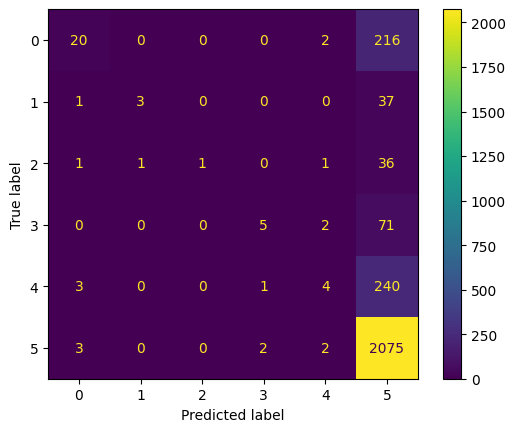

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, RF_predictions_test)

cmf = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot
cmf.plot();

**Crossvalidation**

In [46]:
from sklearn.model_selection import cross_validate

train_cv = cross_validate(pipeline3, x_train, y_train, cv=5)

train_cv['test_score'].mean(), train_cv['test_score'].std()

(0.7675802730943138, 0.0019006020436983084)

In [47]:
prediction2 = pipeline3.predict(test)
prediction2 = prediction2.astype(int)

In [48]:
submission = pd.DataFrame(columns = ['ID', 'Rating'])
submission['ID'] = [i for i in range(1,len(prediction2)+1)]
submission['Rating'] = prediction2
submission.to_csv('submission.csv', index = False)

In [49]:
submission.head()

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5


In [50]:
submission['Rating'].value_counts()

Rating
5    4455
0      51
4      20
3      14
1       5
2       1
Name: count, dtype: int64

# KNN

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)

# Define the full pipeline including preprocessing and the model
pipeline4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on training data
pipeline4.fit(x_train, y_train)

# Predict on train and test data
KNN_predictions_train = pipeline4.predict(x_train)
KNN_predictions_test = pipeline4.predict(x_test)

# Evaluate the model
accuracy = pipeline4.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.755042170883755


**Hyperparameter tuning**

In [52]:
# from sklearn.model_selection import GridSearchCV

# # Define the grid of hyperparameters to search over
# param_grid = {
#     'model__n_neighbors': [3, 5, 7, 9, 11],  # Various values for n_neighbors
#     # You can add more hyperparameters to tune here if needed
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=pipeline4, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Fit GridSearchCV to training data
# grid_search.fit(x_train, y_train)

# # Print best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Evaluate the best model
# accuracy = grid_search.best_estimator_.score(x_test, y_test)
# print("Accuracy of the best model:", accuracy)

In [53]:
from sklearn.metrics import accuracy_score as ac

train_score = ac(KNN_predictions_train, y_train)
test_score = ac(KNN_predictions_test, y_test)
print(f'Train score: {train_score}, Test score: {test_score}')

Train score: 0.7762904556706702, Test score: 0.755042170883755


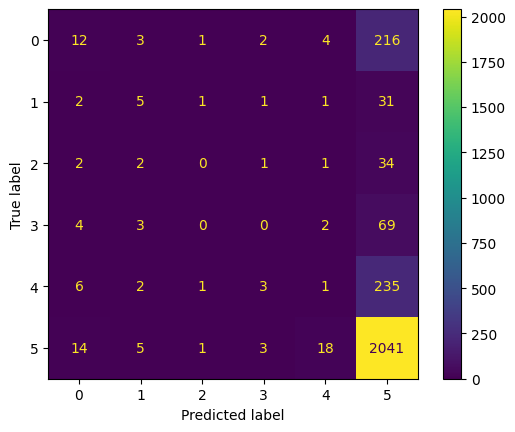

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, KNN_predictions_test)

cmf = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot
cmf.plot();

**Crossvalidation**

In [55]:
from sklearn.model_selection import cross_validate

train_cv = cross_validate(pipeline4, x_train, y_train, cv=5)

train_cv['test_score'].mean(), train_cv['test_score'].std()

(0.752269769205004, 0.005063377264591917)

In [56]:
prediction3 = pipeline4.predict(test)
prediction3 = prediction3.astype(int)

In [57]:
submission = pd.DataFrame(columns = ['ID', 'Rating'])
submission['ID'] = [i for i in range(1,len(prediction3)+1)]
submission['Rating'] = prediction3
submission.to_csv('submission.csv', index = False)

In [58]:
submission.head()

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,3
4,5,5


In [59]:
submission['Rating'].value_counts()

Rating
5    4395
0      71
1      28
4      26
3      18
2       8
Name: count, dtype: int64

# Extra Tree

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

# Define the full pipeline including preprocessing and the model
pipeline5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on training data
pipeline5.fit(x_train, y_train)

# Predict on train and test data
ET_predictions_train = pipeline5.predict(x_train)
ET_predictions_test = pipeline5.predict(x_test)

# Evaluate the model
accuracy = pipeline5.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7715438210487715


**Hyperparameter tuning**

In [61]:
# from sklearn.model_selection import GridSearchCV

# # Define the grid of hyperparameters to search over
# param_grid = {
#     'model__n_estimators': [50, 100, 150],  # Number of trees in the forest
#     'model__max_depth': [None, 10, 20],  # Maximum depth of the trees
#     'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
#     'model__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
#     'model__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=pipeline5, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Fit GridSearchCV to training data
# grid_search.fit(x_train, y_train)

# # Print best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Evaluate the best model
# accuracy = grid_search.best_estimator_.score(x_test, y_test)
# print("Accuracy of the best model:", accuracy)


In [62]:
from sklearn.metrics import accuracy_score as ac

train_score = ac(ET_predictions_train, y_train)
test_score = ac(ET_predictions_test, y_test)
print(f'Train score: {train_score}, Test score: {test_score}')

Train score: 0.9966076831392684, Test score: 0.7715438210487715


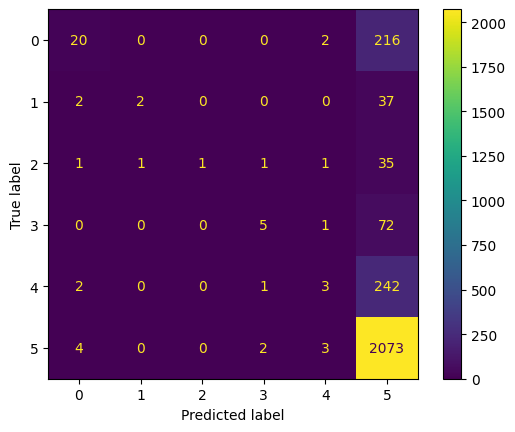

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, ET_predictions_test)

cmf = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot
cmf.plot();

**Crossvalidation**

In [64]:
from sklearn.model_selection import cross_validate

train_cv = cross_validate(pipeline5, x_train, y_train, cv=5)

train_cv['test_score'].mean(), train_cv['test_score'].std()

(0.7677636331772902, 0.001870366471499854)

In [65]:
prediction4 = pipeline5.predict(test)
prediction4 = prediction4.astype(int)

In [66]:
submission = pd.DataFrame(columns = ['ID', 'Rating'])
submission['ID'] = [i for i in range(1,len(prediction4)+1)]
submission['Rating'] = prediction4
submission.to_csv('submission.csv', index = False)

In [67]:
submission.head()

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5


In [68]:
submission['Rating'].value_counts()

Rating
5    4447
0      60
4      22
3      12
1       3
2       2
Name: count, dtype: int64

**Hyperparameter Tuning**

# Random forest

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = 'gini',
                           max_depth = 8,
                           min_samples_split = 10,
                           random_state = 5)


pipeline6 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model) 
])


pipeline6.fit(x_train, y_train)


RF_predictions_train = pipeline6.predict(x_train)
RF_predictions_test = pipeline6.predict(x_test)

# Evaluate the model
accuracy = pipeline6.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7634763476347635


In [70]:
from sklearn.metrics import accuracy_score as ac

train_score = ac(RF_predictions_train, y_train)
test_score = ac(RF_predictions_test, y_test)
print(f'Train score: {train_score}, Test score: {test_score}')

Train score: 0.7597872925644081, Test score: 0.7634763476347635


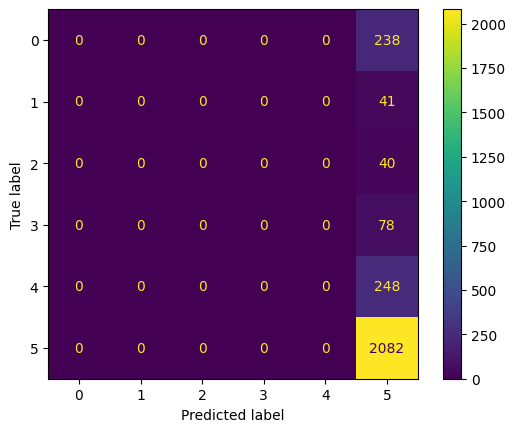

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, RF_predictions_test)

cmf = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot
cmf.plot();

**Crossvalidation**

In [72]:
from sklearn.model_selection import cross_validate

train_cv = cross_validate(pipeline6, x_train, y_train, cv=5)

train_cv['test_score'].mean(), train_cv['test_score'].std()

(0.7597873224762983, 0.00025840560207581625)

In [73]:
prediction5 = pipeline6.predict(test)
prediction5 = prediction5.astype(int)

In [74]:
#submission = pd.DataFrame(columns = ['ID', 'Rating'])
#submission['ID'] = [i for i in range(1,len(prediction5)+1)]
#submission['Rating'] = prediction5
#submission.to_csv('submission.csv', index = False)

In [75]:
#submission.head()

In [76]:
#submission['Rating'].value_counts()

# XGBoost

In [77]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier



# Define XGBoost model
model = XGBClassifier(random_state=42)


pipeline7 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model) 
])


pipeline7 .fit(x_train, y_train)



xgb_predictions_train = pipeline7.predict(x_train)
xgb_predictions_test = pipeline7.predict(x_test)

# Evaluate the model
accuracy = pipeline7.score(x_test, y_test)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.7726439310597727


In [78]:
from sklearn.metrics import accuracy_score as ac

train_score = ac(xgb_predictions_train, y_train)
test_score = ac(xgb_predictions_test, y_test)
print(f'Train score: {train_score}, Test score: {test_score}')

Train score: 0.9241771339506739, Test score: 0.7726439310597727


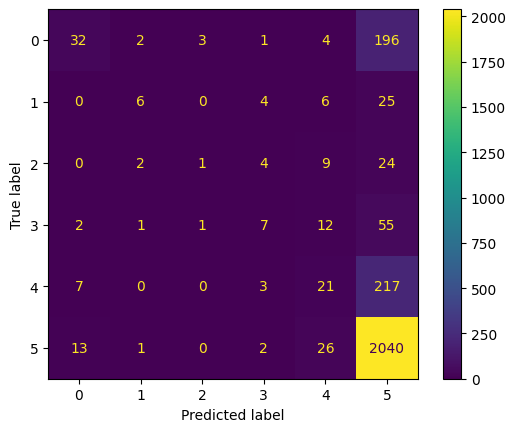

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, xgb_predictions_test)

cmf = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot
cmf.plot();

**Crossvalidation**

In [80]:
from sklearn.model_selection import cross_validate

train_cv = cross_validate(pipeline7, x_train, y_train, cv=5)

train_cv['test_score'].mean(), train_cv['test_score'].std()

(0.7736318282509013, 0.0027842073252470362)

In [81]:
prediction6 = pipeline7.predict(test)
prediction6 = prediction6.astype(int)

In [82]:
submission = pd.DataFrame(columns = ['ID', 'Rating'])
submission['ID'] = [i for i in range(1,len(prediction6)+1)]
submission['Rating'] = prediction6
submission.to_csv('submission.csv', index = False)

In [83]:
submission.head()

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,3
4,5,5


In [84]:
submission['Rating'].value_counts()


Rating
5    4291
4      92
0      90
3      43
1      20
2      10
Name: count, dtype: int64

# Compare models

In [85]:
accuracy1 = pipeline2.score(x_test, y_test)
accuracy2 = pipeline3.score(x_test, y_test)
accuracy3 = pipeline7.score(x_test, y_test)

In [86]:
# Print accuracies
print("Logistic Regression Accuracy:", accuracy1)
print("Random Forest Accuracy:", accuracy2)
print("XgBoost Accuracy:", accuracy3)

Logistic Regression Accuracy: 0.7777777777777778
Random Forest Accuracy: 0.773010634396773
XgBoost Accuracy: 0.7726439310597727


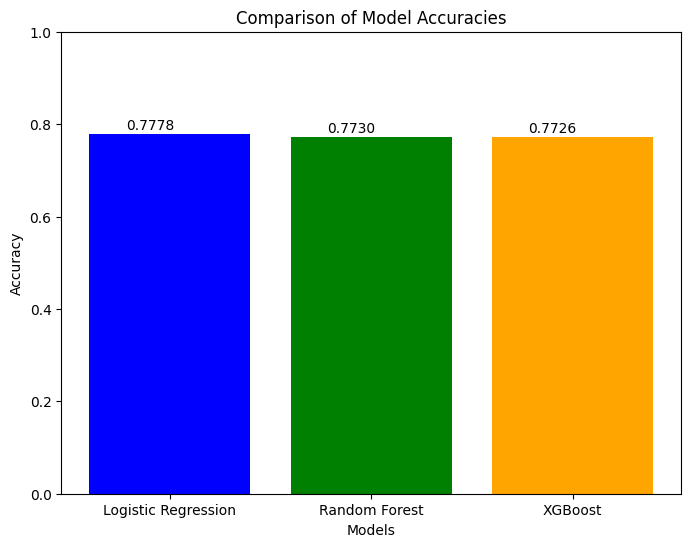

In [87]:
import matplotlib.pyplot as plt

# Define names
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [accuracy1, accuracy2, accuracy3]

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)


for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, 
             bar.get_height() + 0.01, 
             f'{acc:.4f}',  # Display up to 4 decimal points
             ha='center', 
             color='black')

plt.show()


here we can clearly see my best model will be Logistic Regression then XgBoost and Random forest will also give a significant accuracy.

# Best Model
**Logistic Regression**
**Accuracy :- 0.7767**

#############################################################